# Bracket search
### Carl Fredrik Berg, NTNU, 2023

This section will show several simple optimization methods. These are all different types of bracket search methods.

## Simple bracket search

Assume $f(x)$ has a minimum value (if it has a maximum value, it can simply be replaced by $-f$). If $f(x)$ is unimodal on $(a,b)$ we can replace $(a,b)$ with a sub-interval on which $f(x)$ takes its minimum value.
We choose $\alpha$ and $\beta$ in the interval $(a,b)$ so that $\alpha < \beta$. The unimodality of $f(x)$ guarantees that $f(\alpha) < \max[f(a),f(b)]$ and $f(\beta) < \max[f(a),f(b)]$.

If $f(\alpha) < f(\beta)$, then $p < \beta$, so $p \in (a,\beta)$. If $f(\alpha) > f(\beta)$ implies $p > \alpha$, thus $p \in (\alpha,b)$.

Repeating the process of picking pairs $\alpha < \beta$ and reducing the interval containing the point $p$ will iteratively yield the minimum point.


Number of function evaluations:  42


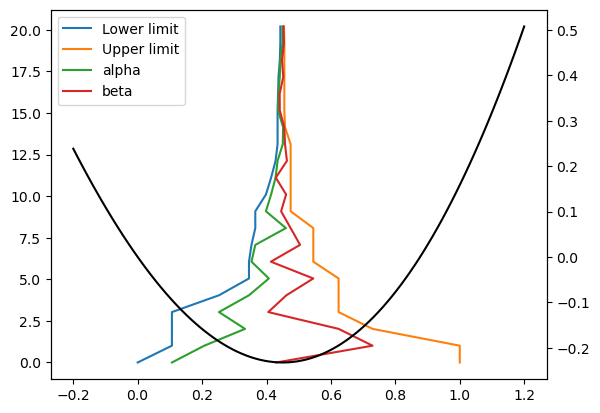

In [17]:
from random import random
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return x**2 - np.sin(x)

#Create an intervall x to plot f(x)
xv = np.linspace(-0.2,1.2,100)

#Maximum number of iterations
n = 100
nn = np.linspace(0,n,n)

#Error tolerance
eps = 1e-2

#Storing values during run for later plotting
a=np.zeros(n)
b=np.zeros(n)
alpha=np.zeros(n)
beta=np.zeros(n)

#Starting values for our interval [a,b] and internal points alpha and beta
a[0] = 0
b[0] = 1

ii=0
while(ii<n and (b[ii]-a[ii])>eps):
    #Picking two random numbers between a and b
    alpha[ii]=(b[ii]-a[ii])*random()+a[ii]
#    beta[ii]=(b[ii]-alpha[ii])*random()+alpha[ii]
    beta[ii]=(b[ii]-a[ii])*random()+a[ii]
    #If beta is larger than alpha, then switch the numbers
    if beta[ii]<alpha[ii]:
        temp=alpha[ii]
        alpha[ii]=beta[ii]
        beta[ii]=temp
    falpha=func(alpha[ii])
    fbeta=func(beta[ii])
    ii+=1
    if falpha<fbeta:
        a[ii]=a[ii-1]
        b[ii]=beta[ii-1]
    else:
        a[ii]=alpha[ii-1]
        b[ii]=b[ii-1]

print('Number of function evaluations: ',2*ii)
        
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(a[:ii],nn[:ii],label='Lower limit')
ax1.plot(b[:ii],nn[:ii],label='Upper limit')
ax1.plot(alpha[:ii],nn[:ii],label='alpha')
ax1.plot(beta[:ii],nn[:ii],label='beta')
ax2.plot(xv,func(xv),color='k')
ax1.legend(loc='upper left')
plt.show()  


Let us try to improve this method by choosing the new locations $\alpha < \beta$ better than just random values. The obvious choice would be to spread them out evenly in the space $[a,b]$, thus, let 
$$\begin{align}
\alpha &= \frac{1}{3}(b-a) +a \\
\beta &= b -\frac{1}{3}(b-a) \\
\end{align}$$

This is implemented below.

Number of function evaluations:  24


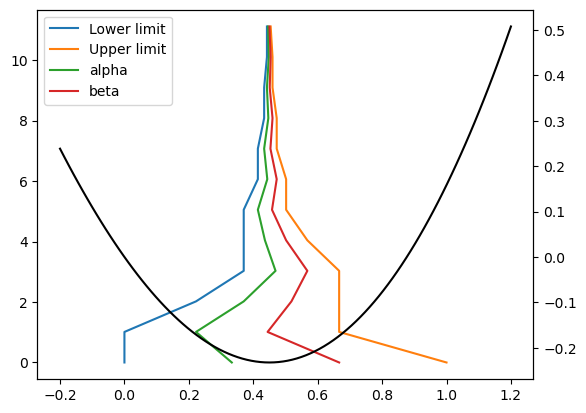

In [18]:
#Storing values during run for later plotting
a=np.zeros(n)
b=np.zeros(n)
alpha=np.zeros(n)
beta=np.zeros(n)

#Starting values for our interval [a,b] and internal points alpha and beta
a[0] = 0
b[0] = 1

ii=0
while(ii<n and (b[ii]-a[ii])>eps):
    #Picking two evenly distributed numbers between a and b
    alpha[ii]=(b[ii]-a[ii])*(1/3)+a[ii]
    beta[ii]=b[ii]-(b[ii]-a[ii])*(1/3)
    #Function evaluation
    falpha=func(alpha[ii])
    fbeta=func(beta[ii])
    ii+=1
    if falpha<fbeta:
        a[ii]=a[ii-1]
        b[ii]=beta[ii-1]
    else:
        a[ii]=alpha[ii-1]
        b[ii]=b[ii-1]

print('Number of function evaluations: ',2*ii)
        
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(a[:ii],nn[:ii],label='Lower limit')
ax1.plot(b[:ii],nn[:ii],label='Upper limit')
ax1.plot(alpha[:ii],nn[:ii],label='alpha')
ax1.plot(beta[:ii],nn[:ii],label='beta')
ax2.plot(xv,func(xv),color='k')
ax1.legend(loc='upper left')
plt.show()  


## Golden ratio method

A simple bracket search where the $\alpha$ and $\beta$ values are chosen randomly is ineffective. The method where they separate the space $[a,b]$ might be efficient when considering the number of iterations, but not necessarily when considering the number of function evaluations. We therefore want a method where we only need one new function evaluation for each iteration. For such a method to be efficient, it will turn out that the three distances between the points $a < \alpha < \beta < b$ will have the ratios $\phi : 1 : \phi$, where $\phi$ is the golden ratio. Thereby its name.

For simplicity we choose $\alpha$ and $\beta$ such that the intervals $(a,\alpha)$ and $(\beta,b)$ are symmetrical.

$$b-\beta  = \alpha-a$$

Thus, if $\alpha$ is given, then we know $\beta$ from

$$\beta = a + b - \alpha$$

In this method, the function value at either $f(\alpha)$ or $f(\beta)$ has already been evaluated at the previous iteration (except for the first iteration). This saves one function evaluation, and speeds up the search process.

To ensure that the resulting new interval has the same ratios between three evaluated points as the previous interval, we must have

$$\frac{\alpha-a}{\beta - \alpha} = \frac{\beta - a}{b -a}$$

Assuming the ratios $\phi : 1 : \phi$, this gives

$$\frac{\phi}{1+\phi} = \frac{1+\phi}{1+2\phi}$$

This is one equation with one unknown, which we can solve for:

$$\begin{align}
\frac{\phi}{1+\phi} &= \frac{1+\phi}{1+2\phi} \\
2 \phi^2 + \phi &= \phi^2 + 2\phi +1 \\
\phi^2-\phi -1 &= 0
\end{align}$$

The solution to the quadratic equation
$$Ax^2 +Bx + C = 0$$
is
$$\frac{-B \pm \sqrt{B^2-4AC}}{2A}$$

In our case, with $A=1,B=-1,C=-1$, we get
$$\frac{1 \pm \sqrt{5}}{2}$$
Since we need a positive $\phi$, we then have
$$\phi = \frac{1 +\sqrt{5}}{2}$$
This is exactly the golden ratio.

We see that we need to have our test points $\alpha$ and $\beta$ a fraction $r=\frac{\phi}{1+2\phi}$ from the ends. The algorithm is then given as
1. $$\begin{align}
      \alpha_i & =  a_i + r(b_i-a_i) \\
      \beta_i  & = b_i - r(b_i-a_i)
      \end{align}$$
2. if $f(\alpha_i) < f(\beta_i)$, then $(a_{i+1},b_{i+1}) = (a_i,\beta_i)$
3. else $(a_{i+1},b_{i+1}) = (\alpha_i,b_i)$



Number of funcation evaluations:  10


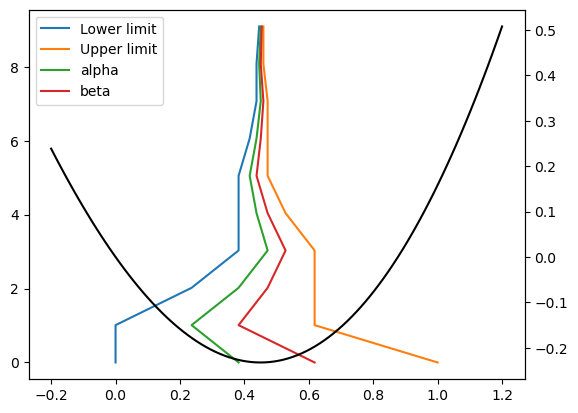

In [20]:
#The golden ration
phi = (1+np.sqrt(5))/2
#The fractional distance
r=phi/(2*phi+1)

#Storing values during run for later plotting
a=np.zeros(n)
b=np.zeros(n)
alpha=np.zeros(n)
beta=np.zeros(n)

#Starting values for our interval [a,b] and internal points alpha and beta
a[0] = 0
b[0] = 1
alpha[0] = a[0]+r*(b[0]-a[0])
beta[0]  = b[0]-r*(b[0]-a[0])

#Evaluate the function at point alpha and beta.
falpha = func(alpha[0]) 
fbeta  = func(beta[0])

ii=0
while(ii<n and (b[ii]-a[ii])>eps):
    ii+=1
    if falpha<fbeta:
        #New endpoints
        #Keep our a point
        a[ii]=a[ii-1]
        #Our new b will be the old beta
        b[ii]=beta[ii-1]
        #New internal points
        #Our new beta point will be the old alpha
        beta[ii]=alpha[ii-1]
        #Calculate a new alpha
        alpha[ii]=a[ii]+r*(b[ii]-a[ii])
        #One new function evaluation
        #The new f(beta) is the old value of f(alpha)
        fbeta=falpha
        #Calculate a new f(alpha) value based on our new alpha point
        falpha=func(alpha[ii])
    else:
        #New endpoints
        #Our new a will be the old alpha
        a[ii]=alpha[ii-1]
        #Keep our b point
        b[ii]=b[ii-1]
        #New internal points
        #Our new alpha point will be the old beta
        alpha[ii]=beta[ii-1]
        #Calculate a new beta
        beta[ii]=b[ii]-r*(b[ii]-a[ii])
        #One new function evaluation
        #The new f(alpha) is the old value of f(beta)
        falpha=fbeta
        #We have to calculate the new f(beta)
        fbeta=func(beta[ii])

print('Number of funcation evaluations: ',ii)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(a[:ii],nn[:ii],label='Lower limit')
ax1.plot(b[:ii],nn[:ii],label='Upper limit')
ax1.plot(alpha[:ii],nn[:ii],label='alpha')
ax1.plot(beta[:ii],nn[:ii],label='beta')
ax2.plot(xv,func(xv),color='k')
ax1.legend(loc='upper left')
plt.show()

## Fibonacci method

The Fibonacci numbers are given by $F_n = F_{n-1} + F_{n-2}$, with $F_0 = 0$ and $F_1 = 1$. This gives the Fibonacci numbers as $0,1,1,2,3,5,8,13,21 \dots$.

Fibonacci search differs from the golden section search only in the way $r$ is chosen. In Fibonacci search $r$ is not constant in each 
subinterval, but rather chosen by
$$r_k = \frac{F_{n-k-1}}{F_{n-k}}$$

It can be shown that for a tolerance $\epsilon$, we will need $n$ iterations where $n$ is the smallest number such that $$F_n > \frac{b_0- a_0}{\epsilon}$$


The algorithm is now:
1. Find $n$ for a given tolerance $\epsilon$.
2. For i from 0 to $n-3$ do: 
     1. $r_i = \frac{F_{n-i-1}}{F_{n-i}}$
     2. $\alpha_i = a_i + (1-r_i)(b_i-a_i)$
     3. $\beta_i = a_i + r_i(b_i-a_i)$
     4. If $f(\alpha_i) < f(\beta_i): (a_{i+1},b_{i+1}) = (a_i,\beta_i)$
     5. Else:  $(a_{i+1},b_{i+1}) = (\alpha_i,b_i)$

The Fibonacci search had some advantages in the old days, as it use more addition and subtraction and less division and multiplication, which is computationally more demanding. This is typically not a big issue anymore with modern day computing.

Note that the ratio of two consecutive numbers in the Fibonacci sequence converge towards the golden ratio.

Number of funcation evaluations:  20


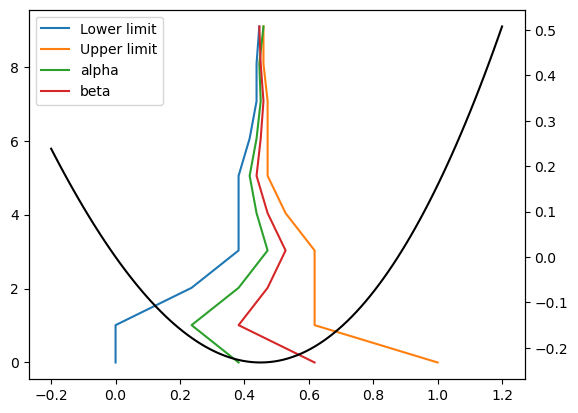

In [21]:
#Storing values during run for later plotting
a=np.zeros(n)
b=np.zeros(n)
alpha=np.zeros(n)
beta=np.zeros(n)

#Starting values for our interval [a,b] and internal points alpha and beta
a[0] = 0
b[0] = 1

#Fibonacci numbers
F=np.zeros(n)
F[0]=0
F[1]=1
for ii in range(2,n):
    F[ii]=F[ii-1]+F[ii-2]

#Criterion for max Fibonacci index
crit = (b[0]-a[0])/eps
#Maximum Fibonacci index
N = np.argmax(F>crit)

#Calculate r-values
r=np.zeros(n)
for ii in np.arange(0,N-3):
    r[ii] = F[N-ii]/F[N-ii+1]


alpha[0] = a[0]+(1-r[0])*(b[0]-a[0])
beta[0]  = b[0]-(1-r[0])*(b[0]-a[0])

#Evaluate the function at point alpha and beta.
falpha = func(alpha[0]) 
fbeta  = func(beta[0])

ii=0
while(ii<n and (b[ii]-a[ii])>eps):
    ii+=1
    if falpha<=fbeta:
        #New endpoints
        #Keep our a point
        a[ii]=a[ii-1]
        #Our new b will be the old beta
        b[ii]=beta[ii-1]
    else:
        #New endpoints
        #Our new a will be the old alpha
        a[ii]=alpha[ii-1]
        #Keep our b point
        b[ii]=b[ii-1]
    #New internal points
    #Calculate a new alpha and beta
    alpha[ii]=a[ii]+(1-r[ii])*(b[ii]-a[ii])
    beta[ii]=a[ii]+r[ii]*(b[ii]-a[ii])
    #Two new function evaluation
    falpha=func(alpha[ii])
    fbeta=func(beta[ii])

        
        
print('Number of funcation evaluations: ',2*ii)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(a[:ii],nn[:ii],label='Lower limit')
ax1.plot(b[:ii],nn[:ii],label='Upper limit')
ax1.plot(alpha[:ii],nn[:ii],label='alpha')
ax1.plot(beta[:ii],nn[:ii],label='beta')
ax2.plot(xv,func(xv),color='k')
ax1.legend(loc='upper left')
plt.show()